In [1]:
import os
import sys
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from multiprocessing import Pool
import warnings
import microscope as mc

from sklearn.metrics import classification_report


sns.set_style("white")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
base_d = "/Users/erankotler/dinamo"
data_d = os.path.join(base_d, "data/gse_data_20231002")

results_d = os.path.join(base_d, "resutls")

In [3]:
[d for d in os.listdir(data_d) if d.startswith("GSE")]

['GSE145361',
 'GSE111223',
 'GSE190348',
 'GSE42861',
 'GSE111942',
 'GSE87095',
 'GSE147221',
 'GSE175364',
 'GSE111629',
 'GSE121192']

In [4]:
gse_acc = "GSE111629" # PD ~550 samps
# gse_acc = "GSE145361" # PD, ~1800 samps
gse_d = os.path.join(data_d, gse_acc)

In [5]:
data = mc.Dataset(gse_d=gse_d)
data.load_data()#max_CpGs=5000) 
data.organize_data()

# Examine original label names
data.orig_label_names

array(['case', 'control'], dtype=object)

In [6]:
data.df.shape

(571, 486427)

In [7]:
all_data_model = mc.train_on_entire_dataset(data, penalty='l1', internalCV_folds=10, feat_selection='wilcox', nan_policy='impute_by_median')

Removing/imputing NaN feature values
Selecting features using Mann-whitney
Standizing data
Training model
Run time: 2313.4 sec


In [8]:
all_data_model["trained_model"]

LogisticRegressionCV(Cs=array([1.00000000e-04, 1.29154967e-03, 1.66810054e-02, 2.15443469e-01,
       2.78255940e+00, 3.59381366e+01, 4.64158883e+02, 5.99484250e+03,
       7.74263683e+04, 1.00000000e+06]),
                     cv=10, n_jobs=-1, penalty='l1', random_state=42,
                     solver='liblinear')

In [10]:
len(all_data_model['features_used'])

86904

In [11]:
cv_res = mc.cv_train_test(data, 
                  CV = 10, # "LOO" # 10 #"LOO"
                  penalty = 'l1', 
                  internalCV_folds = 10)

Starting cross validation
CV fold 0 Train size: 513, test size: 58 (fract positives in train: 0.575)
Fold time: 4633.8 sec
CV fold 1 Train size: 514, test size: 57 (fract positives in train: 0.599)
Fold time: 4643.5 sec
CV fold 2 Train size: 514, test size: 57 (fract positives in train: 0.595)
Fold time: 4581.0 sec
CV fold 3 Train size: 514, test size: 57 (fract positives in train: 0.595)
Fold time: 4548.3 sec
CV fold 4 Train size: 514, test size: 57 (fract positives in train: 0.584)
Fold time: 4674.1 sec
CV fold 5 Train size: 514, test size: 57 (fract positives in train: 0.564)
Fold time: 4687.4 sec
CV fold 6 Train size: 514, test size: 57 (fract positives in train: 0.599)
Fold time: 4549.6 sec
CV fold 7 Train size: 514, test size: 57 (fract positives in train: 0.554)
Fold time: 4565.4 sec
CV fold 8 Train size: 514, test size: 57 (fract positives in train: 0.599)
Fold time: 4559.1 sec
CV fold 9 Train size: 514, test size: 57 (fract positives in train: 0.584)
Fold time: 4638.7 sec


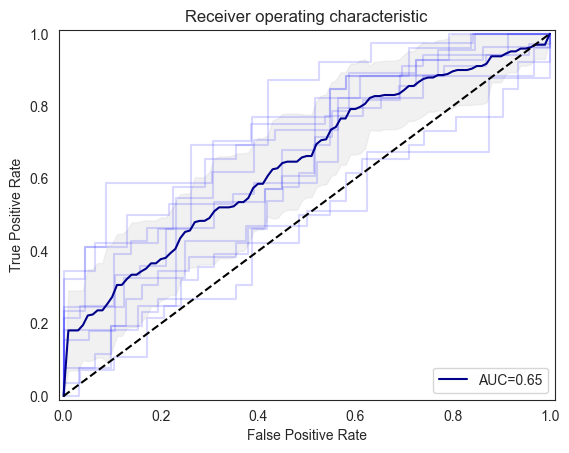

In [12]:
mc.plot_cv_roc(cv_res)

In [13]:
THRESH = 0.4
print(classification_report([item for sublist in cv_res["y_test"] for item in sublist], 
                            cv_res["y_pred"] >THRESH))

              precision    recall  f1-score   support

           0       0.51      0.58      0.55       237
           1       0.67      0.61      0.64       334

    accuracy                           0.60       571
   macro avg       0.59      0.60      0.59       571
weighted avg       0.61      0.60      0.60       571



#### Load second dataset:

In [14]:
gse_acc2 = "GSE145361" # PD, ~1800 samps
gse_d2 = os.path.join(data_d, gse_acc2)

In [15]:
data2 = mc.Dataset(gse_d=gse_d2)
data2.load_data()#max_CpGs=5000) 
data2.organize_data()

# Examine original label names
data2.orig_label_names

array(['control', 'case'], dtype=object)

In [16]:
data2.df.shape

(1889, 485237)

In [18]:
import pickle

In [19]:
# save the model to disk
models_d = os.path.join(base_d, "models")
out_f = os.path.join(models_d, gse_acc + "_model_v0.dat")
pickle.dump(all_data_model, open(out_f, 'wb'))
print ("Model saved to", out_f)

Model saved to /Users/erankotler/dinamo/models/GSE111629_model_v0.dat


In [42]:
# from sklearn.linear_model import LogisticRegressionCV


In [46]:
# mc.feature_imputation_values(data.df.head(), nan_policy="impute_by_median")

cg00000029    0.529685
cg00000108    0.972180
cg00000109    0.918766
cg00000165    0.201936
cg00000236    0.858085
                ...   
rs9363764     0.580104
rs939290      0.585004
rs951295      0.507779
rs966367      0.581994
rs9839873     0.944881
Length: 486427, dtype: float64

In [ ]:
# 1) Need to train on intersection of features from the different datasets
# 2) Need to keep imputation values from training
# 3) Need to keep Standard scaler from training to use on test set

df = df.fillna(feature_imputation_values(df, nan_policy=nan_policy))



scaler = StandardScaler().fit(X_train)
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [3]:
data2.y

NameError: name 'data2' is not defined

In [33]:
data.df.shape, data2.df.shape

((571, 486427), (1889, 485237))

In [34]:
data1_feats = data.df.columns
data2_feats = data2.df.columns

In [35]:
len(data1_feats), len(data2_feats)

(486427, 485237)

In [37]:
all_overlap_feats = [feat for feat in data1_feats if feat in data2_feats]
len(all_overlap_feats)

485237

In [41]:
model_feats = all_data_model["features_used"]
common_feats = [feat for feat in model_feats if feat in data2_feats]
len(model_feats), len(common_feats)

(86904, 86881)

In [20]:
len(all_data_model["features_used"])

86904

In [22]:
test_data_feats = data2.df.columns

In [23]:
common_feats = [feat for feat in all_data_model["features_used"] if feat in test_data_feats]

In [24]:
len(common_feats)

86881

In [32]:
data1_feats = data.df.columns

In [31]:
len(data1_feats), len(test_data_feats), len(all_overlap_feats)

(486427, 486427, 486427)

# HERE

              precision    recall  f1-score   support

           0       0.74      0.71      0.73       237
           1       0.80      0.83      0.81       334

    accuracy                           0.78       571
   macro avg       0.77      0.77      0.77       571
weighted avg       0.78      0.78      0.78       571



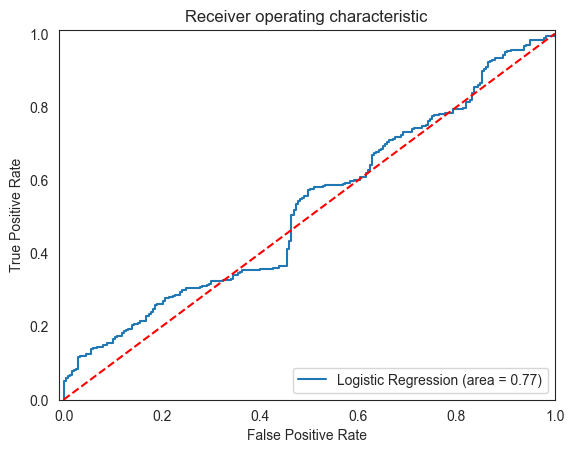

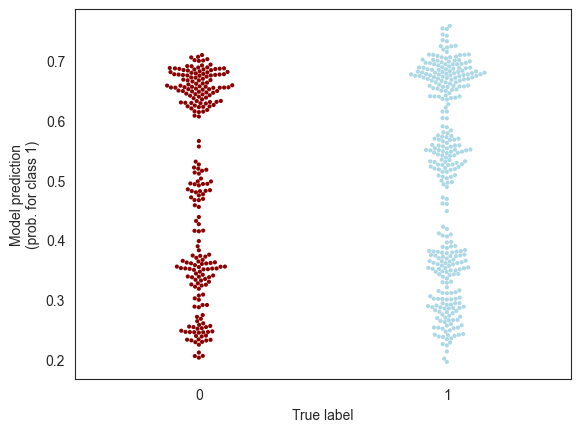

In [132]:
print(classification_report(y, y_pred))

helper.plot_roc_curve(y, y_pred, preds_prob, out_f=None)

sns.swarmplot(x=y, y=preds_prob, size=3, palette=["darkred","lightblue"])
plt.xlabel("True label")
plt.ylabel("Model prediction\n(prob. for class 1)")
plt.show()

In [166]:
# Regularization lambdas across models (lower=stronger regularization):
Cs = pd.DataFrame([m.C_ for m in models], columns=["C"])
Cs["C"].value_counts()

C
2.782559     3
35.938137    2
Name: count, dtype: int64